Detyra:

Te mblidhen 20-30 komente per nje restorant/hotel ne Kosove dhe te pregaditet nje analize e sentimentit ne 3 kategori (pozitiv, neutral, negativ). 
Te ipet mundesia e testimit me koment te ri. Pershkruani zgjidhjen dhe dorezoni kodin si rezultat.

In [1]:
#Importimi i librarive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

Ne vazhdim kam krijuar nje dataset manualisht duke marrur reviews dhe sentimentet e tyre nga TripAdvisor per hotelin Swiss Diamond Hotel ne Prishtine.

Gjithsej kam marrur 30 reviews, prej te cilave 10 jane negative, 10 jane neutrale, dhe 10 jane pozitive. Arsyeja e ndarjes se tille eshte qe te krijohet nje dataset i balancuar, dhe modeli qe perdoret me vone te mos jete i anshem. Ne TripAdvisor sistemi i vleresimit eshte ne shkallen 1 deri ne 5 yje. 

Per komentet negative kam marrur 5 komente me vleresim 1 yll, 5 komente me vleresim 2 yje. Per komente neutrale kam marrur 10 komente me 3 yje. Derisa per komente pozitive 5 komente me vleresim 4 yje dhe 5 komente me vleresim 5 yje. Arsyeja e kesaj eshte qe komentet pozitive dhe negative te mos jene shume pozitive ose shume negative dhe te krijoje mundesi per modelin te gjeneralizoje. 

Komentet jane te vendosura ne dataset ne kolonen reviews, derisa sentimentet ne kolonen sentiment

In [2]:
data = {
    'reviews':[
        "Staying at Swiss Diamond Hotel was amazing. Everybody was so nice and helpful, the food was splendid and the swimming pool was so relaxing. I ordered dinner by room service and was served a perfectly cooked salmon in my room. Perfect after a long days work.",
        "Very nice place in the center of Pristina, it was a nice time. Very friendly staff just right everything you have the feeling like in a luxury country like Dubai so also the reception of staff, we are very satisfied. I can only recommend",
        "Swiss Diamond is located in the heart of Pristine, hotel is somehow small with a nice hotel, a lobby bar and a spa.This hotel has excellent front desk and concierge team, always smiling and ready to help.Rooms are spacious but bathrooms are even larger than bed rooms which is simply amazing!",
        "Better than expected. Nice and comfortable rooms, excellent breakfast and spa, friendly staff. Quiet and peaceful, I did not hear any traffic. Pays off to stay there, services exceed price. Real five stars, indeed. Location is perfect, the walking zone of Priština.",
        "What a beautiful and superb 5 star hotel in central Pristina! Luxury restaurant, delicious breakfast, amazing spa and heated pool guaranteed excellent stay for two days. The room was silent and personnel was very friendly. There were several  good cafes and restaurants nearby.",
        "The hotel has a good location near shops and restaurants.The room was large and there  was very neat and clean everywhere.Overall, the room was very nicely maintained The staff was  polite and helpful.",
        "It was totally worth it. I went on a trip around Prishtina, and this was the place the struck most. I went there with my wife, and we enjoyed it very much. They were very kind, and we felt like we were at home.",
        "One night in a standard business room. Excellent location, right smack down town. Room extremely clean. Strange decor. Staff professional .Breakfast pretty bad.Pristina is a great city, check it out.",
        "A Hotel that I recommend for its attentive staff, comfortable rooms & great Health spa centre complex.The gym is good & could do with a few more dumb bells,the pool & sauna areas are superb.A choice of several saunas is available.Location is good.Breakfast very good.In room checker missed a couple of items(minor issue)& quickly fixed.",
        "Stayed one night in this hotel and appreciated the place. Centrally located, kind staff, comfortable room and great breakfast terrace with nice view on the pedestrian area. Long story short: I would go here again. By the way: although compact Pristina is a fun and vibrant city! ",
        "The pros: the hotel is central, the Deluxe room was spacious and the bed was comfortable, the breakfast was nice, the valet and bellhop service was professional and friendly. The cons: they charge 70 Euro PER ANIMAL for a pet room, which wasn't clear when I called and spoke to the front desk before booking our stay. When we arrived, they informed me that it would be 140 Euro for the two dogs, which was more than double the cost of the room. I was also told that booking the room though their website was cheaper than booking by calling the hotel. I booked a room online for two adults and a toddler, which included an extra bed. Upon arrival, we had a baby crib that was too small for a child.",
        "Conveniently located in the pedestrian zone, the hotel looks lush and posh. Breakfast is really good and the shower was the biggest I have seen in my life. However, there were also some drawbacks which do really affect my review: - only 1 towel provided in the double room although we were 2 people in the room- staff in the bar does not speak English at all- extras such as water bottle in the room are ridiculously expensive. If you want to be a 5 star hotel, issues like that make a very bad impression. It's probably one of the best hotels in Pristina, but I am not sure I'd come back taking into account the high price you pay for the room!",
        "Great location in the centre of town. Good staff, and a decent spread for breakfast. The decor in the room was a little over the top, and we had to call reception to fix the LED lights as none of the switches worked. Would recommend for a stay but maybe better suited as a business hotel. I wouldn't call it 5*, maybe 4* is more suitable for the amenities.",
        "We stayed this week in what could be a very nice old world European hotel, however sadly the Swiss Diamond is missing customer engagement and lack that import human touch. Rooms were small, clean but ok. Food and beverage generally good, albeit a little old fashioned. Staff were cold, never smiling and impersonal. Management, from the top, seemed disengaged and more eager to be enjoying their breakfast than checking I guest satisfaction. Hotel transfer in departure was late, leaving a bad final impression. Sadly it all could have been so much better and a real experience if the management and staff would have just tried.",
        "5 star hotel, but still left to be desired. My room was spacious and clean overall. I had some problems with A/C and also when you are under shower, a lot of water is collected on the floor (a problem with sewer?). I wood not say food in the restaurant is up to the 5 star hotel status. All the staff was friendly and very helpful. Used shuttle service from/to airport and it was OK, even if we were bit late to depart from the hotel in the morning. Anyway I will book again if I visit Pristina again. This looks to be the best hotel in the city.",
        "This hotel is fine. I had booked a room with a US government rate, which apparently is not enough to get a room with a bathtub, a room away from the elevators, or a room on a higher floor. No real complaints about the hotel--it is very nice, service is nice, rooms are clean, breakfast is great. It's just that the rate they accept for those traveling on US government business gets you a sub-par room. I asked several times over the course of 2 weeks to change to a room where I could sleep better, but they couldn't accommodate due to the low rate of 90 euros. I'll stay somewhere else next time and get a better night's sleep!",
        "Stayed here in December and had a very pleasant stay. The staff was excellent, service was good and the breakfast was super. The room was spacious and clean.  Being a 5 star hotel, I was surprised they didn't offer any kettle and free coffee/tea  in the room. I had to call room service for a kettle. Also the shower in the bathroom smelled of fungus.  The bath room was quite chilly, thanks to the cold marble floor with no heating in it. Otherwise a nice hotel, 5 star of course - compared to other hotels nearby. Of course the Turkish bath was out of service - but have it ever worked at all???? I think none of my friends who have been to this spa has ever seen the turkish bath being in use.",
        "Good place for western 'luxury'. Stayed a few nights here. It offers everything you would expect from a westernised, corporate, business hotel. The service was particularly good and the location is excellent. If I go to Prishtina again, I will stay here.",
        "A hotel not living up to their 5 Star rating. Breakfast buffet has been cold each and everyday, coffee runs out daily and they don't seem to pay much attention to restocking the food that quickly runs out. Room service is terrible and they don't clean the rooms very well, I came back to a dirt covered floor with large pieces of lint all over the carpet so bad I had to pick it up with my fingers because it looked gross and unclean. The bed is as hard as a sheet of plywood, I don't know if my back can take much more! When I asked for a foam pad to make it more sleepable they said it wasn't possible, so much for being a 5 star rated Hotel! If this is the best Kosovo has to offer, then I can only imagine what the rest are like. The Spa looked nice but a lot of the thinks like the whirlpool were broken. I do not recommend this Hotel for the money they are charging. It's more like a entry level 4 Star hotel than a 5.",
        "A hotel living on reputation but not keeping up with it. I think that if you only occassionally go on holiday this place is a good stay but for people like us who spend a great deal of time in hotels for work this is becoming an unacceptable alternative. With more nice hotels in the city I think we'll be trying them out.",
        "Sin. what was once an excellent address now turns out to be a pretentious hotel but one that offers very little. Rooms not clean, taps in the bathroom ruined, food absolutely not up to a '5' (?) star rating. Even the breakfast, once truly excellent, is now starting to decline in quality. Better to stay a little outside the city but with much better hotels",
        "This hotel is located in the heart of Pristina, but it was not easy to find by taxi driver if he is not local. Many staff are not well trained.   Room Keycard didn't work.  Had to change my room back and forth.   Room is not well maintained with issues here and there.  Wifi is slow, and couldn't surf well.  I needed a taxi to Skopje and the doorman got me an illegal  / unlicensed taxi by saying 'he is my friend and a good driver'.  I thought it was a legal and licensed taxi, but,  after all, it was an awful scheme. Overall, this is not a five star hotel. Very disappointed.",
        "The location gets AAA. Service below standard. Coffee was decent. In summer its a half decent  spot  to chill out... Morning breakfast is better. But overall vibe is boring. It's like dated. A bad designers 1980s kinda feel. ",
        "Overpriced and not great food. I went one day for a business meeting with my friends, the food was served a bit cold, also the chief could not make my meal as I ordered, I did not sleep in the hotel but I will not go there because of the prices mostly.",
        "Awful service, upon checking in immediately one of the party was rebooked into another room as they had made a mistake, apparently he was put in a 'better' room, having stayed here before that was a lie. The rooms however were clean and tidy. Upon arriving for breakfast the food and service was awful. I was seated then moved the selection was poor so I settled for soft boiled eggs, these were rock hard and the bread selection was stale, I wasn't offered any drinks and waiting staff ignored me when I tried to get their attention. This was my second time staying at the Swiss diamond and now the last",
        "No sound proofing to the windows can hear everything out side. Booking was made online but hotel had no track of it…… twice.Air con didn’t workLights in room wouldn’t turn off. Room are nice but very loud! Staff pretty nice but not very accommodating. ",
        "This hotel is a disgrace.  For the 5 star rating - it’s absolutely not up to standard.  One look at how menu is described and you will be convinced.  The price we pay here would surely assure a more accurate description of dishes and more accurate translations.  Ordered a chicken dish- cauliflowers well done but found plenty of ham which was never even mentioned.  Way to go!!! 10 stars for cultural sensitivity.  Grapes have no taste..  also - when rules hurt a costumer don’t you think they should be ment? My eyes are watering - literally- yet rules are no lights can be shifted.  And no other accommodations offered... please,  it would much 5 starish if your staff can speak proper English... referring to someone as mam- highly obsolete- just very disappointing dinner.  I can’t really speak as to other areas of hotel.",
        "Terrible!!! We came to Swiss Diamond for a Sunday Brunch. The billboard outside the hotel featured a beautiful photo of delicious pancakes and eggs so we were hooked. However , the open buffet offered nothing related to breakfast but only average/poor food. When we asked for scrambled eggs and pancakes we were told it would be an extra and that we needed to pay more. They didn't even ask if we wanted to drink tea/coffee. The 'Sunday Brunch' ad was hugely MISLEADING. It was a very disappointing Bayram Brunch. Never again! I Can't believe this is a 5 star hotel.",
        "It does not worth money and nerves. The hotel is overated, prices are higher than in Europe, staff are the worst that I have ever seen in any Hotel in Europe, you have to ask 10 times to get something, they are rude. I don't know who is boss of the hotel but I would change all of them. Food is good but very expensive 56 euros two persons eating is very high when you see that you don't eat something special.",
        "Forget it! For a hotel that bills ltself as 5 stars, it ought to be ashamed. I asked for a dry (DRY) gin martini and asked for the kind of gin I wanted (seen on the bar). The waiter brought me a gimlet with a straw and was quite offended when I explained that wasn't THere are too many good restaurants within a stone's throw of the hotel that have great drinks and a great attitude.  My friend brought me here to welcome me to Kosovo. What a disappointment!"
    ],
    'sentiment':['Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Positive', 
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Neutral',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative',
                 'Negative'
                ]
}

df = pd.DataFrame(data) 

In [3]:
df.head()

,reviews,sentiment
0,Staying at Swiss Diamond Hotel was amazing. Ev...,Positive
1,"Very nice place in the center of Pristina, it ...",Positive
2,Swiss Diamond is located in the heart of Prist...,Positive
3,Better than expected. Nice and comfortable roo...,Positive
4,What a beautiful and superb 5 star hotel in ce...,Positive


In [4]:
"""
Ne vazhdim kam bere shuffle te datasetit.
Arsyeja pse e kam bere kete eshte per shkak te struktures se datasetit,
ku te gjitha komentet pozitive, negative dhe neutrale ishin te njepasnjeshme.
Per te mundesuar gjeneralizimin e modelit, eshte bere shuffle i datasetit.
"""

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
#Shnderrimi i kolones sentiment ne kolone me vlera kategorike

df['sentiment'] = df['sentiment'].astype('category')

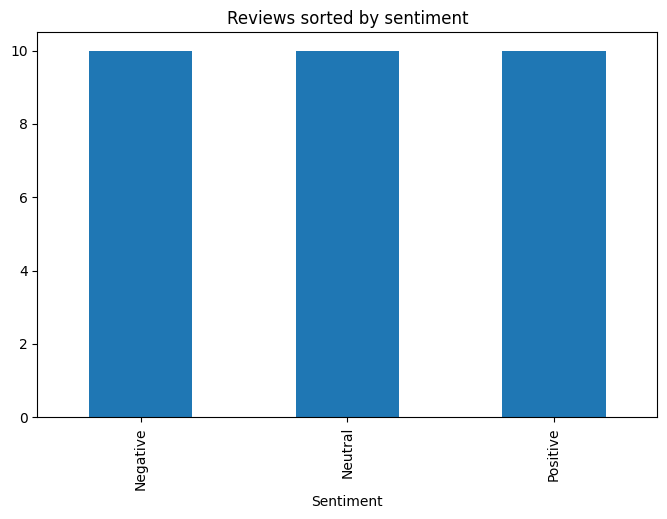

In [6]:
#Paraqitja vizuale e reviews ne dataset sipas sentimentit. Numer i barabarte te komenteve per secilin sentiment (10)

ax = df['sentiment'].value_counts().sort_index().plot(kind='bar', title='Reviews sorted by sentiment', figsize=(8,5))
ax.set_xlabel('Sentiment')
plt.show()

In [7]:
example = df['reviews'][13]
sent = df['sentiment'][13]
print(example)
print(sent)

We stayed this week in what could be a very nice old world European hotel, however sadly the Swiss Diamond is missing customer engagement and lack that import human touch. Rooms were small, clean but ok. Food and beverage generally good, albeit a little old fashioned. Staff were cold, never smiling and impersonal. Management, from the top, seemed disengaged and more eager to be enjoying their breakfast than checking I guest satisfaction. Hotel transfer in departure was late, leaving a bad final impression. Sadly it all could have been so much better and a real experience if the management and staff would have just tried.
Neutral


In [8]:
df.columns

Index(['reviews', 'sentiment'], dtype='object')

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword_en = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
"""
Funksioni per lematizimin e tekstit.
Nevojitet si paraprocesim i tekstit per te lehtesuar punen e modelit.
Mban vetem fjalet prej te cilave mund te nxjerre kuptim.
"""

def lemmatize_text(text: str) -> str:
    doc = nlp(text)
    lemmas = [
        tok.lemma_ for tok in doc
        if tok.is_alpha
        and not tok.is_stop
        and tok.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV'}
    ]
    return " ".join(lemmas)

In [11]:
lemma_text = [lemmatize_text(t) for t in df['reviews']]

Train test split i datasetit per vlerat X - teksti i lematizuar nga lista e reviews te marra nga dataseti, dhe y per vlerat kategorike te kolones sentiment te datasetit.

Per shkak te datasetit te vogel (vetem 30 rreshta) ndarja eshte bere e tille qe 30% e te dhenave te behen per testim ne menyre qe testimi te kete nje numer te arsyeshem te testeve per te vleresuar performancen e tij.

Eshte perdorur pipeline per te mundesuar paraprocesimin e te dhenave ne dataset permes tfidf vectorizer, derisa modeli i perzgjedhur eshte Naive Bayes.

Arsyeja pse kam perzgjedhur Logistic Regression te kombinuar me TF-IDF eshte per shkak te datasetit te vogel, te krijohet nje model i thjeshte i cili mund te gjeneralizoje. Nuk kam perdorur BERT sepse nuk funksionon mire ne datasete te vogla, ngase i nevojitet kontekst dhe te dhena per te arritur rezultate. Kombinimi i Logistic Regression me TF-IDF eshte mjaft i mire prandaj nuk kam perzgjedhur modele tjera per te analizuar sentimentin.

Zgjedhja e hiperparametrave eshte bere pas testimit me GridSearchCV dhe pastaj futja e tyre si hiperparametra ne pipeline.
Pas testimit me GridSearchCV jane determinuar qe solver te jete liblinear, penalty=l2 dhe C=10

In [12]:
X = lemma_text
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear', penalty='l2', C=10))
])

Vleresimi i modelit na tregon se modeli nuk ka performance mjaft te mire.
Gjeneralizim me nje dataset te vogel eshte mjaft i veshtire ngase modeli nuk ka mjaftueshem te dhena per te arritur parashikime te mira.
Edhe me ndarje prej 30% te datasetit per testim, modeli prap ka vetem 9 komente ne baze te te cilave bejme vleresimin.
Kjo e ben te veshtire edhe trajnimin edhe testimin e modelit. 

Mirepo, me ato qe i ka ka arritur rezultate te mira ne komente negative:
F1-score: 0.4, precision: 0.5, recall: 0.33

Rezultate te mira ne komente neutrale:
F1-score: 0.57, precision: 0.5 dhe recall: 0.67

Rezultate me te dobeta ne komente pozitive:
F1-score: 0.33, precision: 0.33 dhe recall: 0.33

In [13]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.50      0.33      0.40         3
     Neutral       0.50      0.67      0.57         3
    Positive       0.33      0.33      0.33         3

    accuracy                           0.44         9
   macro avg       0.44      0.44      0.43         9
weighted avg       0.44      0.44      0.43         9



Funksion per te testuar modelin me komente te marra nga inputi i perdoruesit

In [14]:
def predict_comment(text):
    pred = pipeline.predict([text])[0]
    print(f"Predicted sentiment: {pred}")
    return pred

Shtyp run ne 'cell' ne vazhdim dhe provo modelin me komente personale.

In [15]:
comment = input("Enter a comment to get sentiment...")
predict_comment(comment)

Enter a comment to get sentiment... This place was great.


Predicted sentiment: Positive


'Positive'